# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?
2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?
3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?
4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale



<h2 style="color: #FF6347"> 1. Antworten auf Transcodierung und Merkmalsextraktion</h2>  
***

### 1.1 Statistische Größen
**Mittelwert :** 
Das arithmetische Mittel gibt den Durchschnittswert über eine endliche Menge an Zahlen an. 
Addiert man jede Zahl der Menge und teilt das Ergebnis durch die Anzahl, erhält man den Mittelwert.

**Standartabweichung : **
Bei der Standartabweichung geht es darum wie weit oder wie breit sich die Werte um den Mittelwert streuen. 
Ist die Standartabweichung gering so sind die Punkte nah beieinander. 

**Skewness : **
Ist eine Kennzahl, die die Art und Stärke der asymmetrie einer Wahrscheinlichkeisverteilung beschreibt. 
Sie kann nach links(negative Schiefe) oder rechts(positive Schiefe) geneigt sein. 

Auf den Median und der Standartabweichung bezogen bedeutet das (nach Pearson):

S (skewness) = (Erwartungswert - median) / Standartabweichung 

Dabei liegt S im werte Bereich von [-1,1]

**Kurtosis : **
Ist eine Kennzahl für die Steilheit einer eingipfligen Wahrscheinlichkeitsverteilung, Dichte- 
oder Häufigkeitsverteilung. 
Verteilung mit geringer Kurtosis streuen relativ gleichmäßig, bei Verteilungen mit großer Wölbung sind mehr 
extrem Werte zu sehen. 

### 1.2 Fourier-Transformation
Die Fourier-Transformation dekonstruiert das Signal. Es zeigt aus welchen Sinuswellen das Signal zusammengebaut ist. 
Man wechselt quasi die Sicht von der zeitlichen Ebene auf die Spektralsicht. Die X-Achse zeigt nun den Fequenzbereich. 
Zu jedem Zeitpunkt kann nun ein Auschnitt generiert werden, der die Amplitudenlänge auf der Y-Achse für jede 
Sinuswelle anzeigt. Nun erkennt man welche Welle in welchem Frequenzbereich liegt und wie stark diese ist. 

### 1.3 Sampling-Rate
Eine gängige Abtastrate für WAV-Dateien sind 44.100 Abtastungen pro Sekunde = 44,1 kHz 

### 1.4 Merkmale
Die Merkmale sind unter anderem die Standartabweichung, der Mittelwert, die Kurtosis und der Skewness des Signals. 
Das "amp1mean"-Merkmal bedeutet, dass hier ein Sample des Mittelwerts in der Abtastung extrahiert wird. 
Dagegen bedeutet das "amp100mean"-Merkmal, dass es sich um einen Zusammenschnitt von 100 Samples pro Abtastung handelt. 
Die Merkmale, beginnend mit "power1" bis "power10", spalten den Fequrenzbereich in 10 Bereiche und speichern diesen.

### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

<h2 style="color: #FF6347"> 2. Antworten auf Matching der Teilsequenzen </h2>
***
### 2.1 Ähnlichkeiten 
Die Ermittlung einer Ähnlichkeit eines Vektors kann durch unterschiedliche Algorithmen ermittelt werden. So zum Beispiel durch die euklidische Distanz oder den Pearson Algorithmus. 

### 2.2 Module
scipy.spatial.distance -> euclidean() <br>
scipy.stats -> pearsonr()

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.


<h2 style="color:#FF6347<"> 3. Antworten zu Genetischer Algorithmus </h2>
***
### 3.1 Prozessschritte
#### 3.1.1 Population 
Eine Population ist eine Menge von Individuen. Ein Individuum ist ein Lösungskandidat für ein Problem. 
Diese Menge zufälliger Zustände(Chromosomen) wird nun erzeugt.
Ergebnis ist ein Vektor/Liste mit allen möglichen Lösungskandidaten. 

#### 3.1.2 Fitnessfunktion
Eine Evaluierungsfunktion wird auf die Chromosomen angewendet. Dabei erhält man die Güte eines Zustands. 

#### 3.1.3 Selektion
Je höher der Wert eines Chromosomenpaares dass durch die Evaluierungsfunktion ermittelt wurde, umso wahrscheinlicher
wird es für die Reproduktion verwendet. 

#### 3.1.4 Kreuzung
Es gibt verschieden Lösungsansätze: Hier der 1-Punkt-Cross-Over
Nun wird ein zufälliger Kreuzungspunkt innerhalb des Vektors ermittelt. Dann werden die Zustände an 
den Kreuzungspunkten getrennt und untereinander getauscht. Somit bekommt ein Head wieder Tail und andersrum. 

#### 3.1.5 Mutation 
Mit geringer wahrscheinlichkeit wird eine Mutation vollzogen. Dabei wird ein Individuum zufällig gesetzt. 

#### 3.1.6 Austausch
Es werden die Chromosomen durch die neue Generation ersetzt, die den geringsten Fitnesswert besitzen. 
Dabei wird darauf geachte, dass es keine doppelten Chromosome gibt. 

### 3.2 Realisierung
Die Annahme sei, dass jeder Song in Zwei Teilsequenzen, Head und Tail, geteilt wird. Aus jeder Teilsequenz werden 42 Merkmale extrahiert. Bei 70 Songs ergeben sich 140 Merkmals Vektoren. 
#### 3.2.1 Fitnessfunktion 
Zu jedem Head wird die euklidische Distanz zu allen Tails erzeugt. Diese werden in eine Liste Gespeichert. Vergleicht man nun die Distanz des Paares Head_A/Tail_A mit den Distanzen von Head_A mit den restlichen Tails, ergibt sich eine art Ranking. Ist die Distanz für Tail_A nur an dritter Stelle, wird für Head_A der mittlere Rang 3 eingetragen.  
#### 3.2.2 Kreuzung 
Die Chromosomen werden zufällig ausgewählt. Dabei spielt die Fitness eine Rolle, je höher das Ranking desto höher die
Wahrscheinlichkeit, dass diese Ausgewählt werden. 
#### 3.2.3 Mutation 
Mit sehr geringer Wahrscheinlichkeit wird nach der Kreuzung ein zufälliges Merkmal in einem Chromosom neu gewürfelt. 

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

<h2 style="color:#FF6347"> 4. Antwort zu Clustering und Playlistgenerierung </h1>
***
### 4.1 Hierarchisches Clustering
Hier wird ein agglomeratives Clusterverfahren angewendet. Jedes Objekt bildet dabei am Anfang ein eigenes Cluster. Schritt für Schritt werden die Cluster zusammengefasst. <br>
Man benötigt die euklidische Distanz zu allen anderen Vektoren. Nun schaut man sich das Ähnlichkeitsmaß an und zieht eine Grenze für das Cluster. Die grenze sei 10. 
Das heißt, es werden alle Vektoren die innerhalb der euklidischen Distanz von 10, zu einem bestimmten Vektor, in ein gemeinsames Cluster geworfen. Möchte man nun eine Playlist erstellen mit vielen unterschiedlichen Genre, muss das Cluster so vergrößert werden, dass auch der letzte Song, der die weiteste Distanz aufweist, mit einbezogen werden kann. Innerhalb dieses Clusters finden sich natürlich auch viele andere Songs die nicht Teil der Playlist sind. Diese Songs können nun wiederum dazu genutzt werden, um eine zufällig neue Playlist zu erstellen. 

**Notiz :**

Es gibt unterschiedliche Mechanismen um die Distanz zwischen Clustern zu bestimmen und sie zu vereinigen. Besitzt ein Cluster mehr als ein Objekt müssen andere Fusionierungsalgorithmen her:

| Algorithmus     | Verwendungszweck | 
| --------------- |:----------------:| 
| Single-Linkage  |Minimaler Abstand aller Elementpaare <br> aus den beiden Clustern|
| Complete-Linkage|Maximaler Abstand aller Elementpaare <br> aus den beiden Clustern|  
| Average-Linkage |Durchschnittlicher Abstand aller <br> Elementpaare aus den beiden Clustern
| Average-Group-Linkage|Durchschnittlicher Abstand aller <br> Elementpaare aus der Vereinigung von A und B 

und weitere. 


# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [7]:
import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [8]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [9]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [10]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [11]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [16]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    mpg123_command = 'C:\Users\maucher\Downloads\mpg123-1.23.8-x86-64\mpg123-1.23.8-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [17]:
fileList=[]
featureList1=[]
featureList2=[]
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('./BandCollection'):
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.mp3'):
            # Skip any non-MP3 files
            continue
        mp3_file = os.path.join(path, f)
        print mp3_file
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(mp3_file)
        tail, dir1 = os.path.split(tail)
        tail, dir2 = os.path.split(tail)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
        except:
            print "Error: Chunk Features failed"
            continue
        #title=str(track)
        title=str(dir1)+'\\'+str(track)
        print '-'*20+ title +'-'*20
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain=pd.DataFrame(index=fileList,data=numpy.array(featureList1),columns=FeatNames)
MusicFeaturesTrain.to_csv("FeatureFileTrainingAllList1.csv")

MusicFeaturesTest=pd.DataFrame(index=fileList,data=numpy.array(featureList2),columns=FeatNames)
MusicFeaturesTest.to_csv("FeatureFileTestAllList2.csv")

./BandCollection\Adele\01 Hometown Glory.mp3
--------------------Adele\01 Hometown Glory.mp3--------------------
./BandCollection\Adele\02 I'll Be Waiting.mp3
--------------------Adele\02 I'll Be Waiting.mp3--------------------
./BandCollection\Adele\03 Don't You Remember.mp3
--------------------Adele\03 Don't You Remember.mp3--------------------
./BandCollection\Adele\04 Turning Tables.mp3
--------------------Adele\04 Turning Tables.mp3--------------------
./BandCollection\Adele\05 Set Fire To The Rain.mp3
--------------------Adele\05 Set Fire To The Rain.mp3--------------------
./BandCollection\Adele\06 If It Hadn't Been For Love.mp3
--------------------Adele\06 If It Hadn't Been For Love.mp3--------------------
./BandCollection\Adele\07 My Same.mp3
Error: Chunk Features failed
./BandCollection\Adele\08 Take It All.mp3
--------------------Adele\08 Take It All.mp3--------------------
./BandCollection\Adele\09 Rumour Has It.mp3
--------------------Adele\09 Rumour Has It.mp3------------

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**
1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.
2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).
2. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.
3. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.
4. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?
5. Diskutieren Sie das Ergebnis


In [21]:
#Your Code

## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:**
1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung
2. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.
4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

#### Genetischer Algorithmus für die Music Feature Selection

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


Best distance  61.3079671672
Population  [ 15.   9.   6.   7.  14.  18.   4.   5.  17.   2.  11.   3.  10.   8.   1.
  13.  19.  12.  16.   0.  15.]


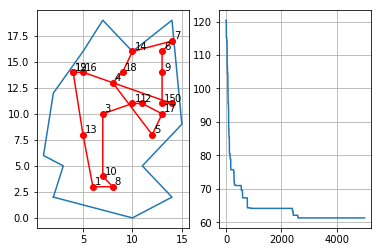

In [35]:
# Genetischer Algorithmus für TSP (traveling salesman problem)

# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.nxutils import pnpoly
from matplotlib.path import Path
from scipy.spatial.distance import pdist,squareform

#Definition von Konstanten für die Anzeige der Stadtindizess
xshift=0.2
yshift=0.2

#Anzahl der Städte
cities = 20

#X- und Y- Koordinaten des Polygons, innerhalb dessen die Städte liegen
x=np.array([2, 10, 14, 11, 15, 14, 10, 7, 5, 2, 1, 3, 2])
y=np.array([2, 0, 2, 5, 9, 19, 16, 19, 16, 12, 6, 5, 2])
Verts=np.array([x,y]).transpose()

#Erzeugen der Städte und der Plot der Städte in der grafischen Oberfläche
plt.figure(1)
plt.subplot(121)
plt.plot(x,y)
plt.grid(True)
plt.hold(True)
i=0
np.random.seed(seed=346466)
locations=np.zeros((cities,2)) #Zufällige Festlegung der Orte
while i in range(cities):
        xp=np.random.randint(0,max(x))
        yp=np.random.randint(0,max(y))
        point = [(xp,yp)]
        path = Path(Verts)
        isin = path.contains_point([xp,yp])
        #isin=pnpoly(xp,yp,Verts) #testet ob der Punkt innerhalb des Polygons liegt
        #print xp , yp, isin
        if isin:
                locations[i,:]=[xp,yp]
                plt.plot([xp],[yp],'ro')
                plt.text(xp+xshift,yp+yshift,str(i))
                i+=1
#print locations
#Berechnung der euklidischen Distanz zwischen allen möglichen Stadtpaaren
distances = squareform(pdist(locations,'euclidean'))
#print distances

np.random.seed()

###########################################################################
#                      Genetischer Algorithmus zur Lösung des TSP         #
###########################################################################

#Definition der Konstanten für den GA
ITERATIONS=5000;
POPSIZE=16;
CROSSPROP=0.99;
MUTPROP=0.05;

bestDist=np.zeros(ITERATIONS) #In diesem Array wird für jede Iteration die beste Distanz gespeichert
#Erzeugen einer zufälligen Startpopulation
population=np.zeros((POPSIZE,cities+1))
for j in range(POPSIZE):
        population[j,0:cities]=np.random.permutation(cities)
        population[j,cities]=population[j,0]
#print population


cost=np.zeros(POPSIZE)#Speichert die Kosten jedes Chromosoms der aktuellen Population
#Berechnung der Kosten jedes Chromosoms


##################################################################################################
for it in range(ITERATIONS):

        #1.Berechne Fitness der aktuellen Chromosomen#################################################
        for j,pop in enumerate(population):
                cost[j]=0
                for z in range(cities):
                    cost[j]= cost[j]+distances[int(pop[z]),int(pop[z+1])]

        sortedIndex=cost.argsort(axis=0)#Indizees der nach ansteigenden Kosten sortierten Chromosomen
        sortedCost=cost[sortedIndex] #die ansteigend sortierten Kosten
        bestDist[it]=sortedCost[0]
        sortedPopulation=population[sortedIndex] #Sortierung der Population nach ansteigenden Kosten
        InvertedCost=1/sortedCost #Berechung des Nutzen (Fitness) aus den Kosten
        #InvertedCost enthält die berechneten Fitness-Werte

        #if it%100==0:
        #        print '-'*10+' Iteration: ',it
        #        print InvertedCost[0]
        #        print sortedPopulation[0]

        #2.Selektion: Zufällige Auswahl von Chromosomen aus der Population####################
        #Mit dem folgenden Prozess wird gewährleistet, dass die Wahrscheinlichkeit für die
        #Selektion eines Chromosoms umso größer ist, je größer sein Nutzenwert ist.
        InvertedCostSum = InvertedCost.sum()
        rn1=InvertedCostSum*np.random.rand()
        found1 = False
        index=1
        while not found1:
                if rn1<InvertedCost[:index].sum(axis=0):
                        found1=index
                else:
                        index+=1
        found1=found1-1
        equal=True
        while equal:
                rn2=InvertedCostSum*np.random.rand()
                found2 = False
                index=1
                while not found2:
                        if rn2<InvertedCost[:index].sum(axis=0):
                                found2=index
                        else:
                                index+=1
                found2=found2-1
                if found2 != found1:
                        equal=False
        parent1=sortedPopulation[found1]
        parent2=sortedPopulation[found2]
        ########## parent1 und parent2 sind die selektierten Chromsomen##############################



        #3.Kreuzung####################################################################################
        crossrn=np.random.rand()
        if crossrn<CROSSPROP:
                cp=np.ceil(np.random.rand()*cities)
                cp=int(cp)
                head1=parent1[:cp]
                tailind=0
                tail1=np.zeros(cities-cp+1)
                for a in range(cities):
                        if parent2[a] not in head1:
                                tail1[tailind]=parent2[a]
                                tailind+=1
                tail1[-1]=head1[0]
                head2=parent2[:cp]
                tailind=0
                tail2=np.zeros(cities-cp+1)
                for a in range(cities):
                        if parent1[a] not in head2:
                                tail2[tailind]=parent1[a]
                                tailind+=1
                tail2[-1]=head2[0]
                child1=np.append(head1,tail1)
                child2=np.append(head2,tail2)
        #child1 und child2 sind die Ergebnisse der Kreuzung###############################################


        #4. Mutation#########################################################################################
        mutrn=np.random.rand()
        if mutrn<MUTPROP:
                mutInd=np.ceil(np.random.rand(2)*(cities-1))
                first=child1[int(mutInd[0])]
                second=child1[int(mutInd[1])]
                child1[int(mutInd[0])]=second
                child1[int(mutInd[1])]=first
                child1[-1]=child1[0]

        mutrn=np.random.rand()
        if mutrn<MUTPROP:
                mutInd=np.ceil(np.random.rand(2)*(cities-1))
                first=child2[int(mutInd[0])]
                second=child2[int(mutInd[1])]
                child2[int(mutInd[0])]=second
                child2[int(mutInd[1])]=first
                child2[-1]=child2[0]
        #child1 und child2 sind die Resultate der Mutation################################################



        #5. Ersetze die bisher schlechtesten Chromosomen durch die neu gebildeten Chromosomen, falls die neuen
        #besser sind
        costChild1=0
        costChild2=0
        for z in range(cities):
                costChild1=costChild1+distances[int(child1[z]),int(child1[z+1])]
                costChild2=costChild2+distances[int(child2[z]),int(child2[z+1])]
        replace1=False
        replace2=False
        index=POPSIZE-1
        while index > 0:
                if sortedCost[index]>costChild1 and not replace1:
                        if not np.ndarray.any(np.ndarray.all(child1==sortedPopulation,axis=1)):
                                sortedPopulation[index]=child1
                        replace1=True
                elif sortedCost[index]>costChild2 and not replace2:
                        if not np.ndarray.any(np.ndarray.all(child2==sortedPopulation,axis=1)):
                                sortedPopulation[index]=child2
                        replace2=True
                if replace1 and replace2:
                        break
                index=index-1
        population=sortedPopulation
        ######################################Ende der Iteration#############################

#Graphische Anzeige der Kosten über die Iterationen und graphische Anzeige des gefundenen Weges
xcoords=[]
ycoords=[]
for i in range(cities+1):
        xcoords.append(int(locations[int(sortedPopulation[0,i]),0]))
        ycoords.append(int(locations[int(sortedPopulation[0,i]),1]))

plt.plot(xcoords,ycoords,'r-')
print "Best distance ",bestDist[-1]
print "Population ",population[0]
plt.subplot(122)
plt.grid(True)
plt.plot(range(ITERATIONS),bestDist)
plt.show()

#### Music Feature Selection

In [24]:
#Your Code

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

![Abbildung Music Clustering](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/playlistCluster.png "Music Clustering")

(50, 2)


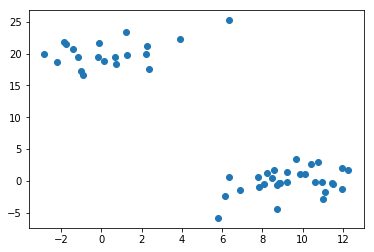

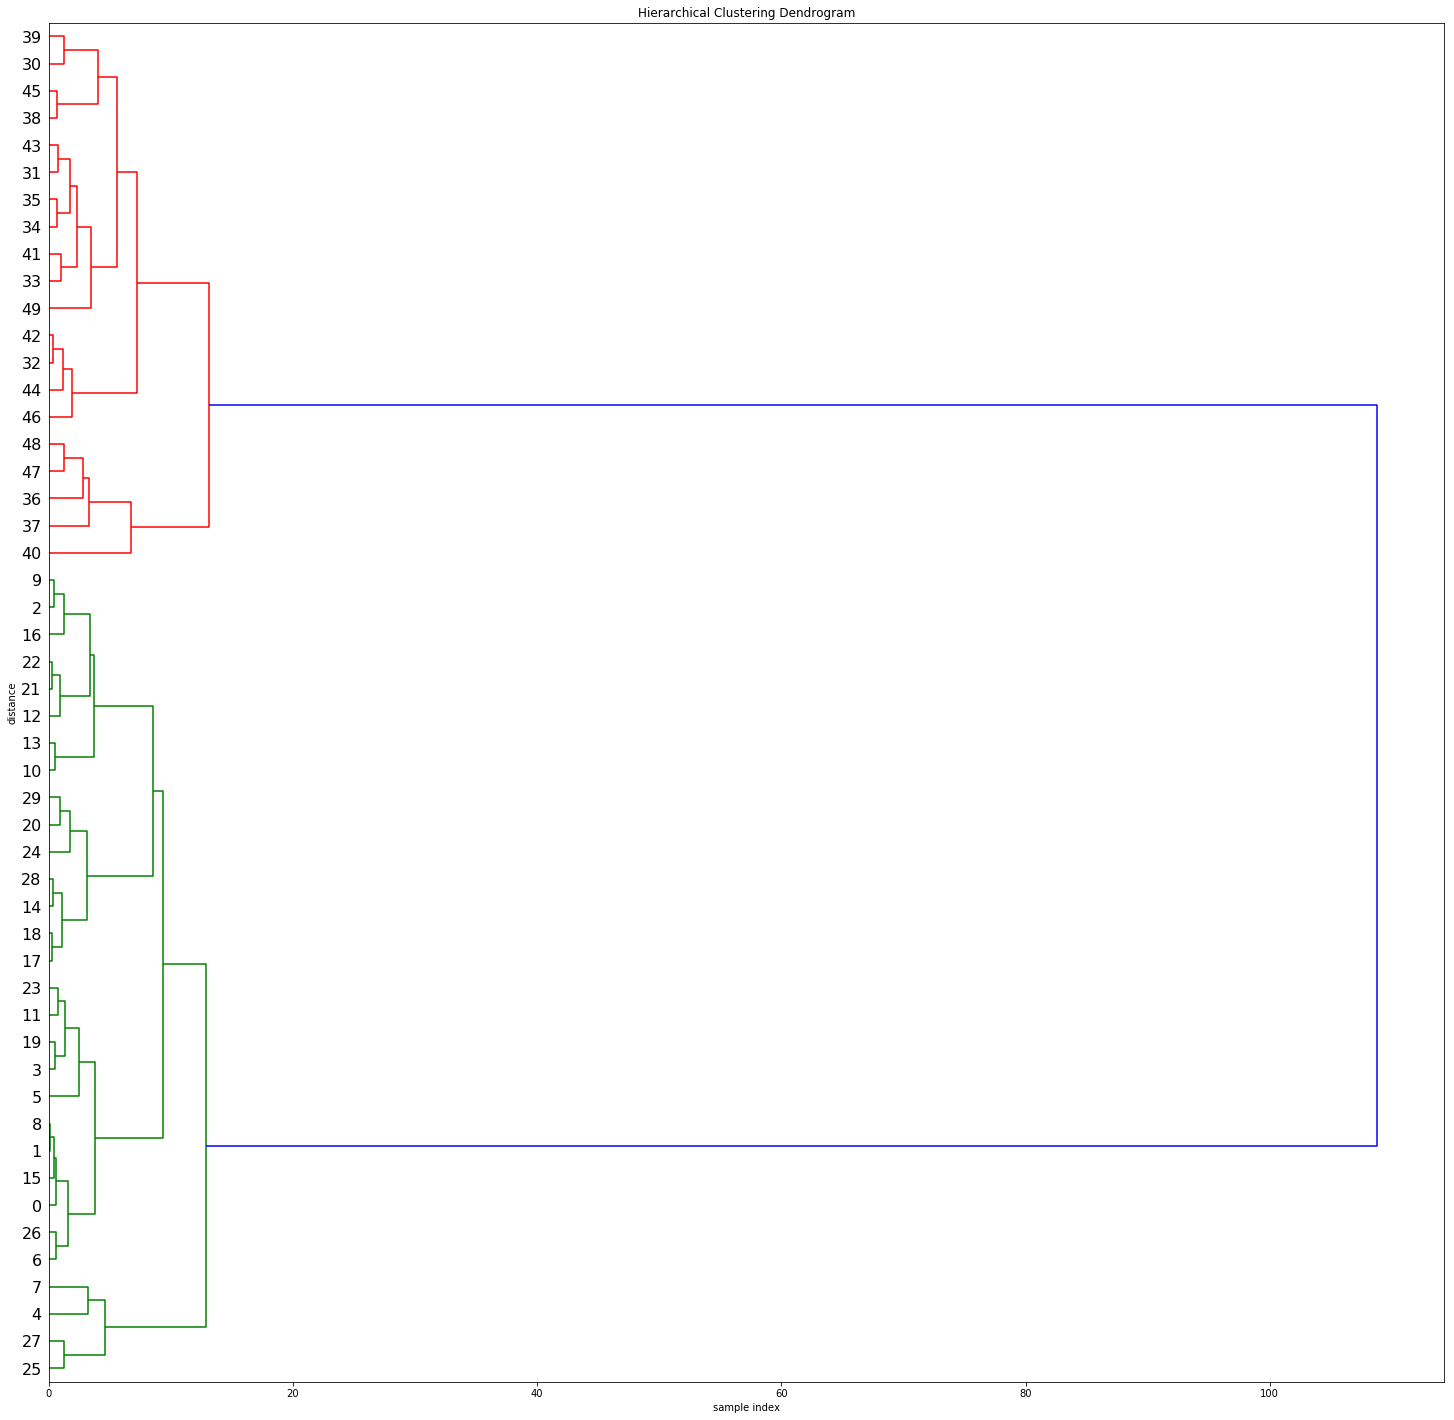

In [62]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[30,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[20,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()


# generate the linkage matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# linkage(y, method='single', metric='euclidean', optimal_ordering=False)
# methods: ward, single, average, complete
# metric: euclidean, hamming, cityblock, cosine
Z = linkage(X, 'ward')


# This compares (correlates) the actual pairwise distances of all your samples to those implied
# by the hierarchical clustering. The closer the value is to 1, 
# the better the clustering preserves the original distances.
c, coph_dists = cophenet(Z, pdist(X))
#print c

# Z[i] tells in which i-th iteration the clusters where merged
# format [indices1, indices2, distant, sample_count]
# print Z[0]


# Z contains 150 Samples indices 0 - 149, every new clusters is now part of Z
'''
# Uncomment and change a, b size to 100 and 50
# Highlights the Dots which where merged to the same cluster. 
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()
'''

# calculate full dendrogram
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation = "right"
)
plt.show()



<h2 style="color:#FF6347"> Lesen eines Dendograms </h2>
***
* Horizontale Linien, zeigen die zusammengefassten Cluster<br>
* Vertikale Linien, zeigen wer Teil dieses Cluster ist<br>
* Die Höhe eines horizontalen Linie sagt aus, welche Distanz überbrückt werden muss um ein neues Cluster zu formen 
